In [1]:
%matplotlib inline

/Users/shoji/go/src/github.com/mikanfactory/CanDataAnalyzer/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from skbayes.mixture_models import VBBMM

In [41]:
import seaborn as sns
sns.set(color_codes=True)

# Preprocess

In [42]:
targetDir = "../data/output/d3/Result/"
speedDir = "../data/output/d3/Speed/"
brakeDir = "../data/output/d3/Brake/"
accelDIr = "../data/output/d3/Accel/"
steeringPositiveDir = "../data/output/d3/SteeringPositive/"
steeringNegativeDir = "../data/output/d3/SteeringNegative/"
aheadDistance = "../data/output/d3/AheadDistance/"
relativitySpeed = "../data/output/d3/AheadRelativitySpeed/"
segmentDir = "../data/output/d3/SegmentSize/"

In [79]:
fname = "result.csv"
df1 = pd.read_csv(speedDir + fname)
df2 = pd.read_csv(brakeDir + fname)
df2.columns = [["id", "brake"]]
df3 = pd.read_csv(accelDIr + fname)
df3.columns = [["id", "accel"]]
df4 = pd.read_csv(steeringPositiveDir + fname)
df4.columns = [["id", "steeringPositive"]]
df5 = pd.read_csv(steeringNegativeDir + fname)
df5.columns = [["id", "steeringNegative"]]
df6 = pd.read_csv(aheadDistance + fname)
df6.columns = [["id", "near", "intermediate", "far"]]
df7 = pd.read_csv(relativitySpeed + fname)
df7.columns = [["id", "moderate", "slower", "little faster", "faster"]]
df8 = pd.read_csv(segmentDir + fname)
df8.columns = [["id", "segmentSize"]]

In [80]:
df = pd.merge(pd.merge(pd.merge(pd.merge(df1, df2, on="id"), df3, on="id"), df4, on="id"), df5, on="id")
df = pd.merge(pd.merge(df, df6, on="id"), df7, on="id")
df = pd.merge(df, df8, on="id")
gridSize = len(df)

In [104]:
features =  ["red", "brake", "accel", "steeringPositive",  "steeringNegative", "near", "intermediate", "moderate", "little faster", "faster", "segmentSize"]

In [105]:
mf = df[df['red'] + df['yellow'] + df['green'] + df['stop'] > 0]
mf = mf[features]
mf.columns = features

# Summation of all statuses and calculate risk

In [106]:
rows = mf.as_matrix()
mf["sum"] = [np.sum(rows[i][:-1]) for i in range(len(rows))]

In [107]:
mf["risk"] = mf["sum"] / mf["segmentSize"]

In [108]:
mf.describe()

,red,brake,accel,steeringPositive,steeringNegative,near,intermediate,moderate,little faster,faster,segmentSize,sum,risk
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.692308,2.028846,1.490385,0.884615,0.557692,1.048077,1.836538,3.163462,0.365385,0.557692,4.192308,12.625000,2.954585
std,0.956094,3.454157,3.075096,2.815725,2.715747,4.569591,1.712947,5.411442,0.683476,0.953552,5.532037,19.339174,1.376337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.333333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,5.000000,2.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,7.000000,2.500000
75%,1.250000,3.000000,2.000000,1.000000,0.000000,0.000000,3.000000,3.000000,1.000000,1.000000,4.000000,14.000000,3.500000
max,3.000000,30.000000,28.000000,27.000000,27.000000,36.000000,8.000000,39.000000,4.000000,4.000000,41.000000,165.000000,9.000000


In [109]:
mf.sort_values("risk", ascending=False)[:15]

,red,brake,accel,steeringPositive,steeringNegative,near,intermediate,moderate,little faster,faster,segmentSize,sum,risk
55,0,3,2,1,1,0,1,1,0,0,1,9,9.000000
94,0,2,2,1,1,0,1,1,0,0,1,8,8.000000
213,0,5,3,2,0,0,2,1,1,0,2,14,7.000000
441,0,7,5,3,3,1,3,2,2,0,4,26,6.500000
682,0,30,28,27,27,25,1,26,0,1,27,165,6.111111
56,0,6,6,5,3,4,1,5,1,0,6,31,5.166667
134,0,6,4,3,1,0,2,0,1,3,4,20,5.000000
252,0,4,3,2,0,1,2,3,0,0,3,15,5.000000
685,0,4,3,2,0,0,3,2,1,0,3,15,5.000000
341,0,5,5,4,4,3,1,3,3,0,6,28,4.666667


In [110]:
top5 = mf.sort_values("risk", ascending=False)[:5]
top5 = top5[features + ["sum"]]

for key in top5.columns:
    if key == "sum":
        continue
    top5[key] = top5[key] / top5["sum"]

top5 = top5[features]
top5Index = top5.index

In [111]:
top5Index

Int64Index([55, 94, 213, 441, 682], dtype='int64')

# Save

In [112]:
pred = zip(mf.index, mf["risk"])
result = np.zeros(gridSize)

for index, risk in pred:
    result[index] = risk
    
np.savetxt(targetDir + "risks.csv", result, delimiter=",", fmt="%f")

# Risk graph order by index

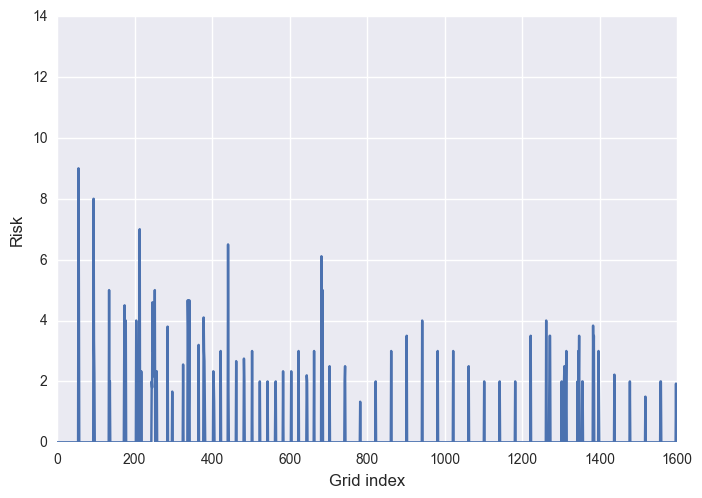

In [113]:
plt.plot(result)
plt.ylim(0, 14)
plt.xlabel("Grid index", size="medium")
plt.ylabel("Risk", size="medium")